# <font color = 'green'> *Diabetes_Diagnosis_Logistic Regression* </font>

##### In this notebook we perform Logistic Regression for classification task. The Dataset contains attributes like Age, BMI, Cholestrol, etc. indicating that person having diabetes or not.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Exploring Dataset
Getting familier with dataset.

In [2]:
df = pd.read_csv('Diabetes Classification.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5132 non-null   int64  
 1   Age         5132 non-null   int64  
 2   Gender      5132 non-null   object 
 3   BMI         5132 non-null   int64  
 4   Chol        5132 non-null   float64
 5   TG          5132 non-null   float64
 6   HDL         5132 non-null   float64
 7   LDL         5132 non-null   float64
 8   Cr          5132 non-null   float64
 9   BUN         5132 non-null   float64
 10  Diagnosis   5132 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 441.2+ KB


In [5]:
# Checking for missing values in Dataset
df.isnull().sum().sum()

0

## Data Cleaning
Dropping column Unnamed: 0 as it is not useful.

In [6]:
df.drop(columns = 'Unnamed: 0', inplace = True)

Gender column contains 'F', 'M', 'f' unique values.
Replacing small 'f' with capital 'F'.

In [7]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [8]:
df['Gender'] = df['Gender'].str.replace('f', 'F')

In [9]:
df['Gender'].unique() # Done

array(['F', 'M'], dtype=object)

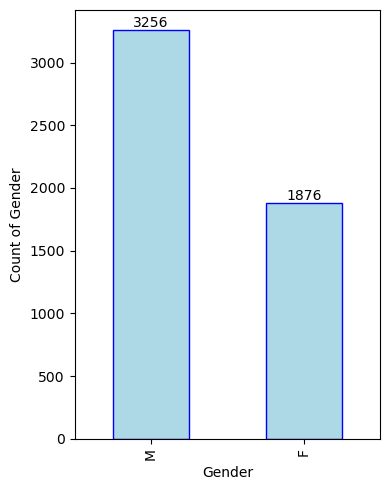

In [10]:
plt.figure(figsize = (4,5))
df['Gender'].value_counts().plot(kind = 'bar', color = 'lightblue', edgecolor = 'b')
plt.ylabel('Count of Gender')
for index, value in enumerate(list(df['Gender'].value_counts().values)):
    plt.text(index, value, value, ha = 'center',va = 'bottom', fontsize = 10)
plt.tight_layout()
plt.show()



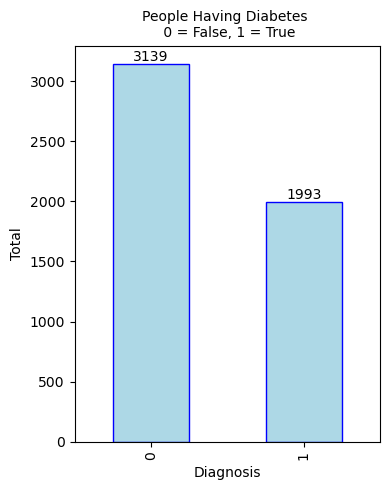

In [11]:
plt.figure(figsize = (4,5))
df['Diagnosis'].value_counts().plot(kind = 'bar', color = 'lightblue', edgecolor = 'b')
plt.ylabel('Total')
for index, value in enumerate(list(df['Diagnosis'].value_counts().values)):
    plt.text(index, value, value, ha = 'center',va = 'bottom', fontsize = 10)
plt.title('People Having Diabetes \n 0 = False, 1 = True', fontsize = 10)
plt.tight_layout()
plt.show()


## Percentage of Males having diabetes

In [12]:
a = pd.DataFrame(df.groupby(['Gender'])[['Diagnosis']].value_counts())
b = a.unstack(level = 1)
b

count      
Diagnosis     0     1
Gender               
F          1118   758
M          2021  1235

In [13]:
#For Males
a.unstack(level = 1).iloc[1]/df['Gender'].value_counts()[0]*100

       Diagnosis
count  0            62.070025
       1            37.929975
Name: M, dtype: float64

#### 37.92% of Males having Diabetes

In [14]:
# for females
a.unstack(level = 1).iloc[0]/df['Gender'].value_counts()[1]*100

       Diagnosis
count  0            59.594883
       1            40.405117
Name: F, dtype: float64

#### 40.40% of Females having Diabetes

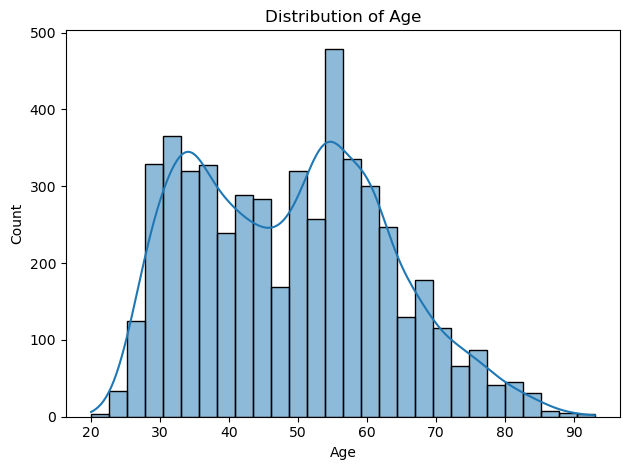

In [15]:
sns.histplot(df['Age'], kde = True)
plt.title('Distribution of Age')
plt.tight_layout();

#### Most of the people having Age between 30 to 70 years.

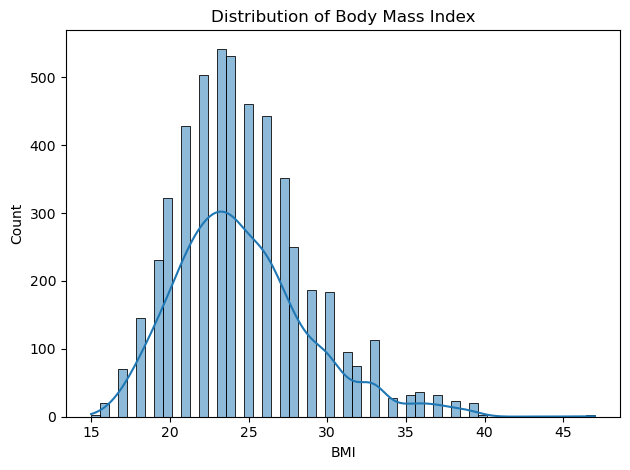

In [16]:
sns.histplot(df['BMI'], kde = True)
plt.title('Distribution of Body Mass Index')
plt.tight_layout();

#### Most of the people having Body Mass Index between 18 to 32 approximately.

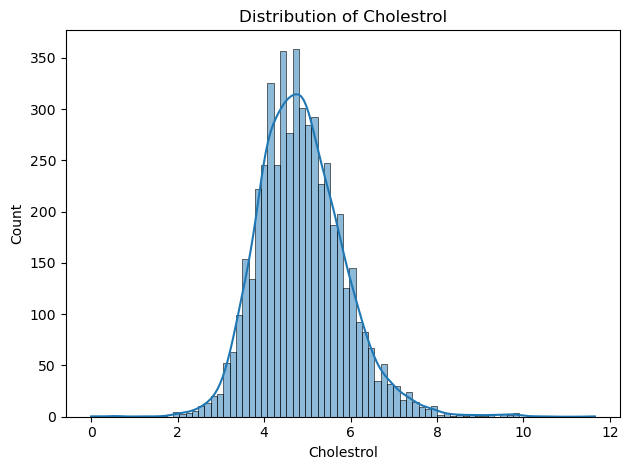

In [17]:
sns.histplot(df['Chol'], kde = True)
plt.title('Distribution of Cholestrol')
plt.xlabel('Cholestrol')
plt.tight_layout();

# Model Building
#### Logistic Regression

In [18]:
X = df.drop(columns = ['Gender', 'Diagnosis'])
y = df['Diagnosis']

In [19]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 555)

In [20]:
# Scaling of Data using standard scaler
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [21]:
X_train = pd.DataFrame(ss.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

In [22]:
X_train.head(1)

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,0.644553,0.09997,-0.684235,0.377003,-0.816905,-0.897501,0.201513,-0.217013


In [23]:
X_test.head(1)

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,1.141213,1.270953,0.682677,-0.269037,-0.556264,0.544343,0.124104,-0.798798


In [24]:
# Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


LogisticRegression()

In [25]:
y_pred = logmodel.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

Confusion Matrix-
[[658 110]
 [145 370]]


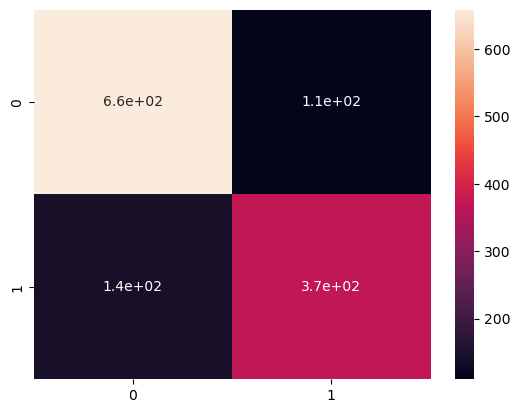

In [26]:
# Confusion Matrix
print(f"Confusion Matrix-\n{confusion_matrix(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True);

In [27]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       768
           1       0.77      0.72      0.74       515

    accuracy                           0.80      1283
   macro avg       0.80      0.79      0.79      1283
weighted avg       0.80      0.80      0.80      1283



In [28]:
logmodel.score(X_test, y_test)
# accuracy_score(y_test,y_pred)

0.8012470771628994

In [30]:
logmodel.predict_proba(X_test)

array([[0.2245396 , 0.7754604 ],
       [0.03580648, 0.96419352],
       [0.54108511, 0.45891489],
       ...,
       [0.65623549, 0.34376451],
       [0.83287135, 0.16712865],
       [0.53781193, 0.46218807]])

# Result:
After training dataset and building model, accuracy achieved by logistic regression is 0.8012 which means approximately 80% of the correct predictions done by the model.

                                          END
-------------------------------------------------------------------------------------------